<a href="https://colab.research.google.com/github/MarkusStefan/Economics/blob/main/Int_Macro_Ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#(a) 
Download annual data for 2000–2021 for GDP (“GDP growth (annual %)”) and government expenditures G (“General government final consumption expenditure (annual % growth)”) for all available G20 countries from the [Worldbank homepage](https://data.worldbank.org/indicator/NE.CON.GOVT.KD.ZG?end=2021&start=2000&view=chart)

# Importing the Data
- modify it into a useful format

## GDP Growth rate (%$Δ$ per annum)

In [1]:
import pandas as pd

Y_growth = pd.read_csv("https://raw.githubusercontent.com/MarkusStefan/Economics/main/GDP-growth.csv", 
                       skiprows=4)
Y_growth.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,6.429817,-0.020479,3.543630,2.116716,5.482371,5.257856,0.635029,-18.589100,17.172509,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.237304,7.98446,5.163873,4.583677,5.328044,...,4.229408,4.039082,2.895728,2.485952,2.639537,2.610797,2.038299,-3.042653,4.402447,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.737146,NaN


#### remove unnecessary columns & switch rows with cols (transposing)

In [2]:
Y_growth.columns[-23 :-1]

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

In [3]:
Y = Y_growth.iloc[:, -23:-1]
#Y = Y_growth[[Y_growth.columns[0]] + Y_growth.columns[-23:-1].tolist()]
Y.index = Y_growth.iloc[:, 0]
Y = Y.transpose()
#Y.rename({'Country Name':'Year'}, inplace=True)
Y.head(5)

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2000,7.616589,3.353978,NaN,3.743667,3.054624,6.946217,3.528362,6.565675,10.852704,-0.788999,...,NaN,6.787316,5.924809,4.514957,5.093045,NaN,6.181916,4.200000,3.897323,-3.059190
2001,4.195963,3.653224,NaN,5.217663,4.205999,8.293313,8.119358,1.700445,1.399085,-4.408840,...,NaN,6.192893,-3.397582,2.009203,7.390129,NaN,3.803646,2.700000,5.316868,1.439615
2002,-0.957771,3.905250,NaN,9.938149,13.665689,4.536524,4.546362,0.677285,2.433457,-10.894485,...,NaN,6.320821,-5.198319,2.304828,5.651959,NaN,3.935232,3.700374,4.506014,-8.894024
2003,1.120879,3.096045,8.832278,5.532113,2.990000,5.528637,8.694204,4.875144,8.800541,8.837041,...,-0.396081,6.899063,4.288335,3.109627,5.212629,NaN,3.747398,2.949075,6.944974,-16.995075
2004,7.281026,5.507315,1.414118,8.022838,10.950000,5.514668,8.135676,8.867132,9.566437,9.029573,...,3.285894,7.536411,3.987393,4.471241,3.087260,NaN,3.972696,4.554560,7.032395,-5.807538


## Government Spending Growth Rate (%$Δ$ per annum)


In [4]:
G_growth = pd.read_csv("https://raw.githubusercontent.com/MarkusStefan/Economics/main/Gov-Exp-Growth.csv", 
                       skiprows=4)
G_growth.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,General government final consumption expenditu...,NE.CON.GOVT.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,General government final consumption expenditu...,NE.CON.GOVT.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.583212,0.892665,0.695295,1.701296,1.394648,-0.306185,0.864823,-1.033105,3.328975,NaN
2,Afghanistan,AFG,General government final consumption expenditu...,NE.CON.GOVT.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#G = G_growth[[G_growth.columns[0]] + G_growth.columns[-23:-1].tolist()]
G = G_growth.iloc[:, -23:-1]
G.index = G_growth.iloc[:, 0]
G = G.transpose()
G.head(5)

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2000,NaN,3.837814,NaN,3.381122,NaN,-9.980737,NaN,NaN,NaN,0.577056,...,NaN,5.013236,NaN,2.347248,NaN,NaN,NaN,2.928539,NaN,NaN
2001,NaN,5.070166,NaN,2.835954,NaN,9.699439,NaN,2.812280,NaN,-2.069403,...,NaN,6.604552,NaN,2.783861,NaN,NaN,NaN,3.122488,NaN,NaN
2002,NaN,5.678363,NaN,10.300300,NaN,5.326795,NaN,2.316918,4.835270,-5.078139,...,NaN,5.383028,NaN,2.919951,NaN,NaN,NaN,4.571452,NaN,NaN
2003,NaN,6.841391,NaN,-2.803095,3.99,-0.717265,NaN,3.983752,4.551820,1.460822,...,-10.787172,7.186416,-0.751554,2.150280,NaN,NaN,NaN,5.653557,NaN,NaN
2004,NaN,5.220011,NaN,83.959748,2.10,4.323646,NaN,5.267591,-1.710161,2.718001,...,2.178649,7.774239,-1.951362,2.200369,NaN,NaN,NaN,5.237397,NaN,NaN


### Selecting G20 countries only

In [6]:
G20_list = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'European Union', 
       'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 
       'Russia', 'Saudi Arabia', 'South Africa', 'South Korea', 'Turkey', 
       'United Kingdom', 'United States']
G20_list

['Argentina',
 'Australia',
 'Brazil',
 'Canada',
 'China',
 'European Union',
 'France',
 'Germany',
 'India',
 'Indonesia',
 'Italy',
 'Japan',
 'Mexico',
 'Russia',
 'Saudi Arabia',
 'South Africa',
 'South Korea',
 'Turkey',
 'United Kingdom',
 'United States']

In [7]:

# compute the intersection to see which countries are available in the data sets
G20 = set(G20_list) & set(Y.columns.tolist()) & set(G.columns.tolist())
# countries member of G20 but not available
na = set(G20_list) - G20
print(f"G20-members not available:\t %s" %([c for c in na]))

G20-members not available:	 ['Turkey', 'South Korea', 'Russia']


In [8]:
# another option without using set theory
'''
for i, country in enumerate(G20):
  if (country not in Y.columns.tolist()) or (country not in G.columns.tolist()):
    print(i, country)
    G20.pop(i)
'''

'\nfor i, country in enumerate(G20):\n  if (country not in Y.columns.tolist()) or (country not in G.columns.tolist()):\n    print(i, country)\n    G20.pop(i)\n'

In [9]:
G20 = list(G20)
# removing China due to NaN values
G20.remove('China')
Y = Y[G20]
G = G[G20]
Y; G

Country Name,France,United Kingdom,Japan,Mexico,Argentina,India,Australia,Brazil,European Union,Indonesia,Italy,United States,Germany,Canada,Saudi Arabia,South Africa
2000,1.802429,3.288287,3.875614,3.120501,0.577056,1.375864,3.128173,-0.151267,2.327141,6.491007,3.377067,1.536644,1.614530,3.436845,NaN,2.928539
2001,1.034593,4.298386,2.383217,-2.728948,-2.069403,2.353301,1.881889,2.615923,2.295811,7.563695,5.503719,3.558214,0.546178,3.405534,1.172138,3.122488
2002,1.799211,4.093983,1.907115,0.344518,-5.078139,-0.185249,3.384297,3.816324,2.162991,12.993466,1.342463,3.836841,1.209877,2.261831,-0.769101,4.571452
2003,1.931887,4.477542,1.866354,-0.155426,1.460822,2.775859,2.784632,1.596563,1.747123,10.033662,1.400595,1.714172,0.731886,2.880214,3.964854,5.653557
2004,2.181523,4.220310,1.088920,-0.971080,2.718001,3.975792,4.476536,3.876037,1.272137,3.990437,0.636106,1.538856,-0.593364,1.875095,7.961696,5.237397
2005,1.262635,2.409035,0.793558,2.255791,9.855435,8.822174,3.051894,2.010945,1.570358,6.635241,0.564513,0.837527,0.596906,1.063641,8.731266,1.079029
2006,1.343145,2.087637,0.224077,2.707571,3.722523,4.053400,3.064630,3.560799,2.097503,9.610453,-0.470866,1.220054,1.114070,2.751493,7.987029,3.767475
2007,1.817838,1.344221,1.487909,1.822830,7.829779,9.424665,3.087954,4.069147,2.053911,3.893873,0.508598,1.601800,1.700598,2.374963,1.792239,6.204136
2008,1.136677,2.034574,-0.088055,2.926328,5.015078,11.364017,3.101106,2.045040,2.622189,10.428277,1.324224,2.450536,3.721151,3.761145,3.685283,7.671208
2009,2.408420,1.398981,1.969584,2.939431,5.634254,14.190386,4.135722,2.945168,2.324455,15.674945,-0.085262,4.261579,3.156221,2.696630,0.600812,1.765739


#(b) 
For each of the countries you should calculate the correlation between GDP and G in the following ways:


- Function for computing the correlation between the two Data Frames

In [10]:
def correlation(df1, df2, table=False):
  if df1.columns.tolist() != df2.columns.tolist():
    return "unbalanced dataframes!"

  corr_l = []
  if table:
    print("%39s - %s\n" %(df1.index[0], df2.index[-1]))
  for i, col in enumerate(df1.columns.tolist()):
    corrcoef = df1[col].corr(df2[col])
    corr_l.append(corrcoef)
    if not table:
      continue
    if corrcoef < 0:
      print("%20s: corr(Y,G)\t\t=\t%s" %(col, round(corrcoef,6)))
    else: 
      print("%20s: corr(Y,G)\t\t=\t %s" %(col, round(corrcoef,6)))
  if not table:
    return corr_l

#correlation(Y, G)

## (i) 
calculate the correlation between GDP and G for the years 2000–2019


In [11]:
# remove the last 2 years (2021, 2020)
Y_, G_ = Y.iloc[:-2, :], G.iloc[:-2, :]
Y_.tail(3)

Country Name,France,United Kingdom,Japan,Mexico,Argentina,India,Australia,Brazil,European Union,Indonesia,Italy,United States,Germany,Canada,Saudi Arabia,South Africa
2017,2.291420,2.443570,1.675332,2.113129,2.818503,6.795383,2.282184,1.322869,2.838481,5.069786,1.667859,2.241921,2.680231,3.039880,-0.741528,1.157947
2018,1.865066,1.705021,0.584068,2.194995,-2.617396,6.453851,2.883045,1.783667,2.065953,5.174292,0.925811,2.945385,0.981233,2.777041,2.514166,1.522329
2019,1.842972,1.604309,-0.240351,-0.199048,-2.000861,3.737919,2.171396,1.220778,1.805107,5.019288,0.483198,2.294439,1.056604,1.879592,0.333781,0.303453


In [12]:
correlation(Y_, G_, table=True)

                                   2000 - 2019

              France: corr(Y,G)		=	-0.287227
      United Kingdom: corr(Y,G)		=	 0.197977
               Japan: corr(Y,G)		=	 0.065741
              Mexico: corr(Y,G)		=	 0.291548
           Argentina: corr(Y,G)		=	 0.640378
               India: corr(Y,G)		=	 0.304637
           Australia: corr(Y,G)		=	 0.174664
              Brazil: corr(Y,G)		=	 0.664405
      European Union: corr(Y,G)		=	 0.071709
           Indonesia: corr(Y,G)		=	-0.297185
               Italy: corr(Y,G)		=	 0.444705
       United States: corr(Y,G)		=	-0.335078
             Germany: corr(Y,G)		=	-0.191371
              Canada: corr(Y,G)		=	-0.064836
        Saudi Arabia: corr(Y,G)		=	 0.44881
        South Africa: corr(Y,G)		=	 0.45519


## (ii) 
calculate the correlation between GDP and G for the years 2000–2021

In [13]:
correlation(Y, G, table=True)

                                   2000 - 2021

              France: corr(Y,G)		=	 0.794815
      United Kingdom: corr(Y,G)		=	 0.766816
               Japan: corr(Y,G)		=	-0.031345
              Mexico: corr(Y,G)		=	 0.328518
           Argentina: corr(Y,G)		=	 0.686343
               India: corr(Y,G)		=	 0.21929
           Australia: corr(Y,G)		=	-0.309994
              Brazil: corr(Y,G)		=	 0.73931
      European Union: corr(Y,G)		=	 0.329105
           Indonesia: corr(Y,G)		=	 0.100947
               Italy: corr(Y,G)		=	 0.367176
       United States: corr(Y,G)		=	-0.29669
             Germany: corr(Y,G)		=	-0.277395
              Canada: corr(Y,G)		=	 0.330381
        Saudi Arabia: corr(Y,G)		=	 0.401241
        South Africa: corr(Y,G)		=	 0.389527


## (iii) 
briefly discuss the obtained results

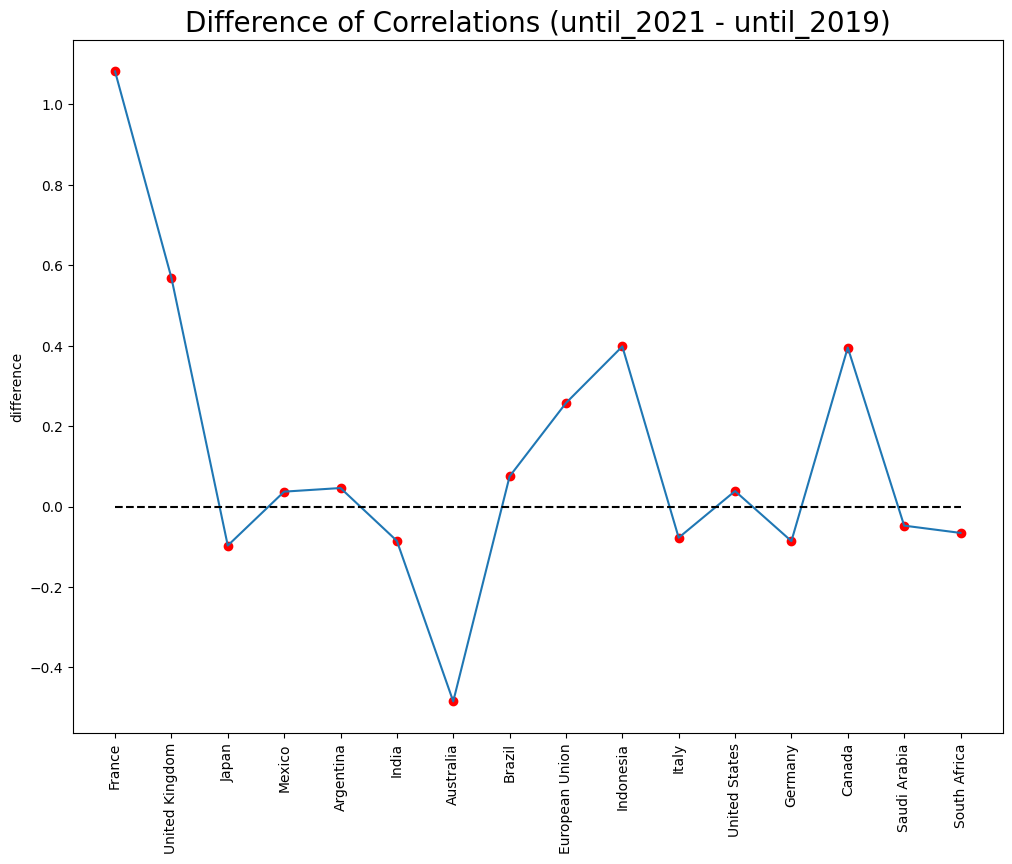

In [14]:
import matplotlib.pyplot as plt

# difference between correlations 2021 - 2019
corr21, corr19 = correlation(Y, G, table=False), correlation(Y_, G_, table=False)
diff = [x21-x19 for x21, x19 in zip(
    corr21, corr19)
]
plt.figure(figsize=(12,9))
plt.plot(Y.columns, diff)
plt.plot(Y.columns, [0]*len(Y.columns), color='k', linestyle='dashed')
plt.scatter(Y.columns, diff, color='red')
plt.xticks(rotation = 90, size=10)
plt.ylabel('difference')
plt.title('Difference of Correlations (until_2021 - until_2019)', size=20)
plt.show()

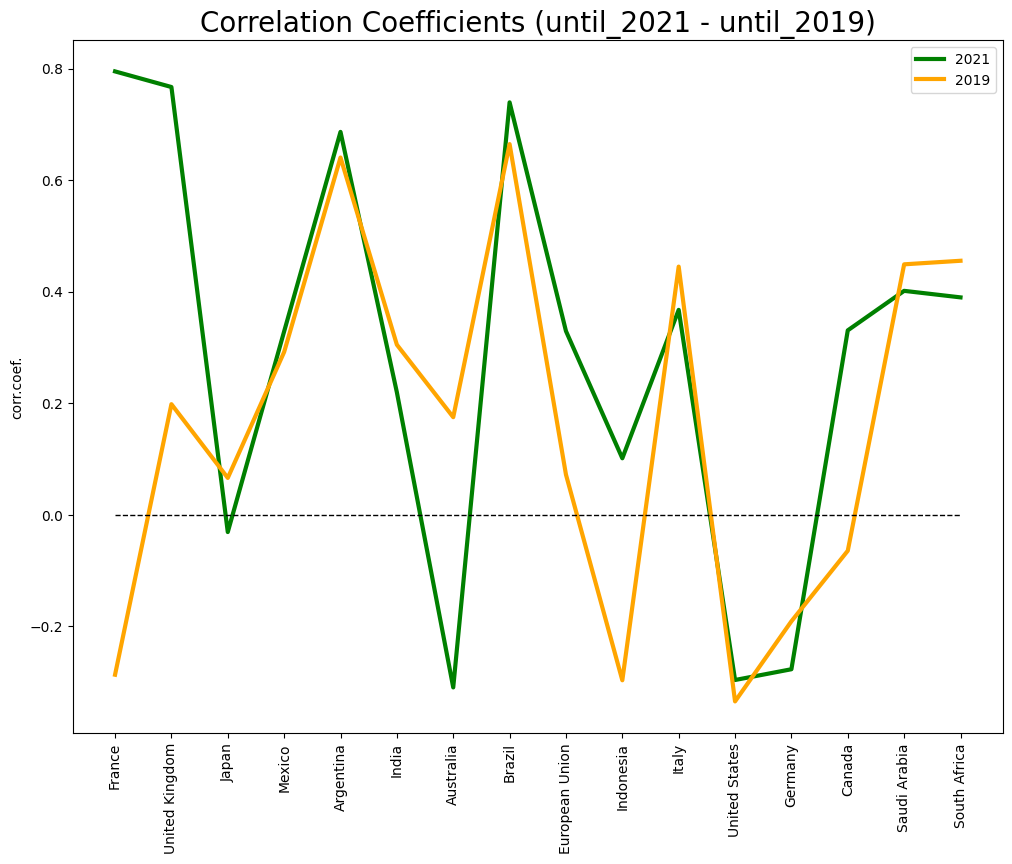

In [15]:
plt.figure(figsize=(12,9))
plt.plot(Y.columns, correlation(Y, G), color='g', linewidth=3)
plt.plot(Y_.columns, correlation(Y_, G_), color='orange', linewidth=3)
plt.plot(Y.columns, [0]*len(Y.columns), color='k', linestyle='dashed', linewidth=1)
plt.xticks(rotation = 90, size=10)
plt.ylabel('corr.coef.')
plt.title('Correlation Coefficients (until_2021 - until_2019)', size=20)
plt.legend(['2021','2019'])
plt.show()

The results imply:

1) **France**
- correlation for Australia was positive before Covid-19 hit 
- once Covid-19 arose, the correlation suddenly drops drastically
- this indicates, that the increase in government spending lead to a decrease in domestic output for Australia

2) **Australia**
- correlation for France was negative before Covid-19, indicating that a plus in government spending resulted in a lower growth rate
- taking into account the Covid-affected years, the government spending had a positive effect on doestic output

Accordingly, increased Government spending had a strongly negative impact on GDP growth in Australia. Conversely, in France, it was highly effective to stimulate the economy after the Covid-19 crisis.
The relationship between government deficit spending and GDP growth is of extreme importance for economic policy making, especially in times of economic downturns as has been experienced in the US and around the world in recent years. There are studies arguing that deficit spending has an adverse effect on the GDP by way of increasing the interest rate and hindering business investment1. Other studies argue for deficit spending at a time of recession as being beneficial in that it spurs demand and has no effect on interest rate.

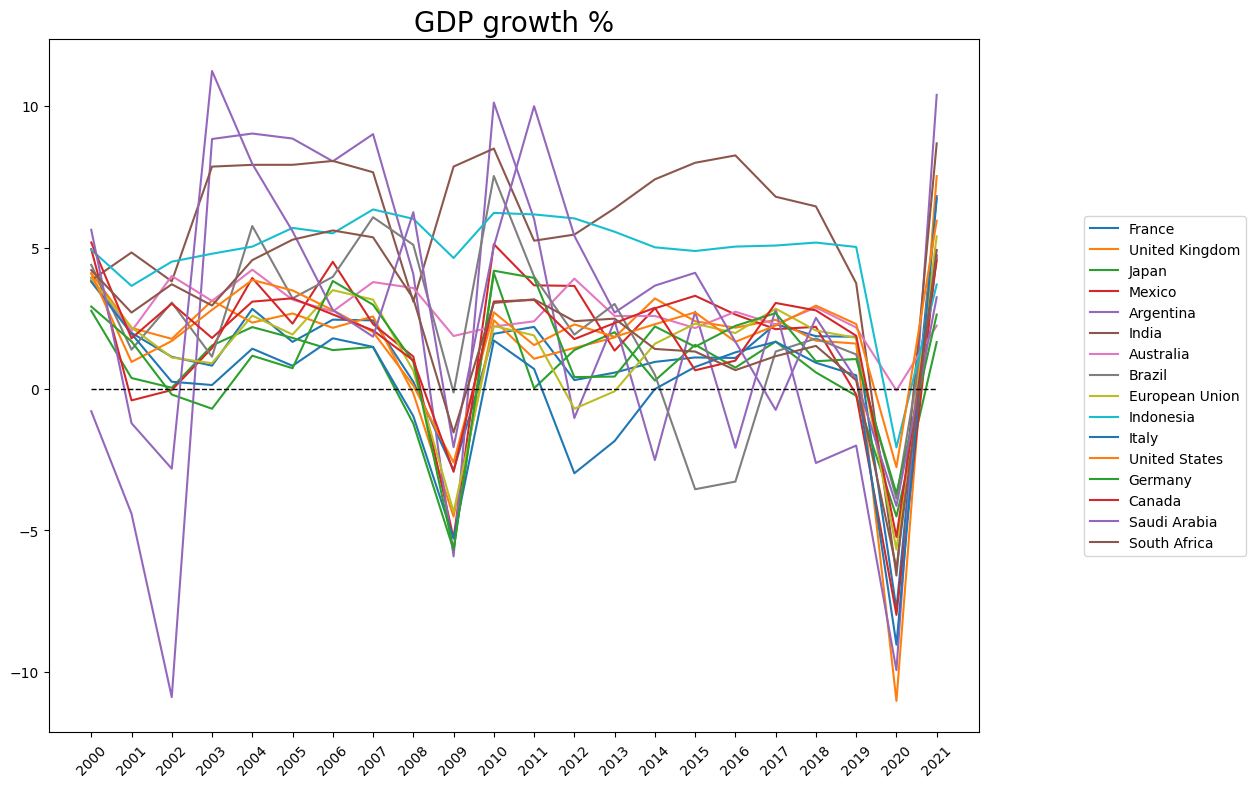

In [16]:
plt.figure(figsize=(12,9))
for c in Y.columns:
  plt.plot(Y.index, Y[c])

plt.legend(Y.columns, bbox_to_anchor=(1.2, 0.5), loc='center')
plt.plot(Y.index, [0]*len(Y.index), color='k', linestyle='dashed', linewidth=1)
plt.xticks(rotation=45)
plt.title('GDP growth %', size=20)
plt.show()

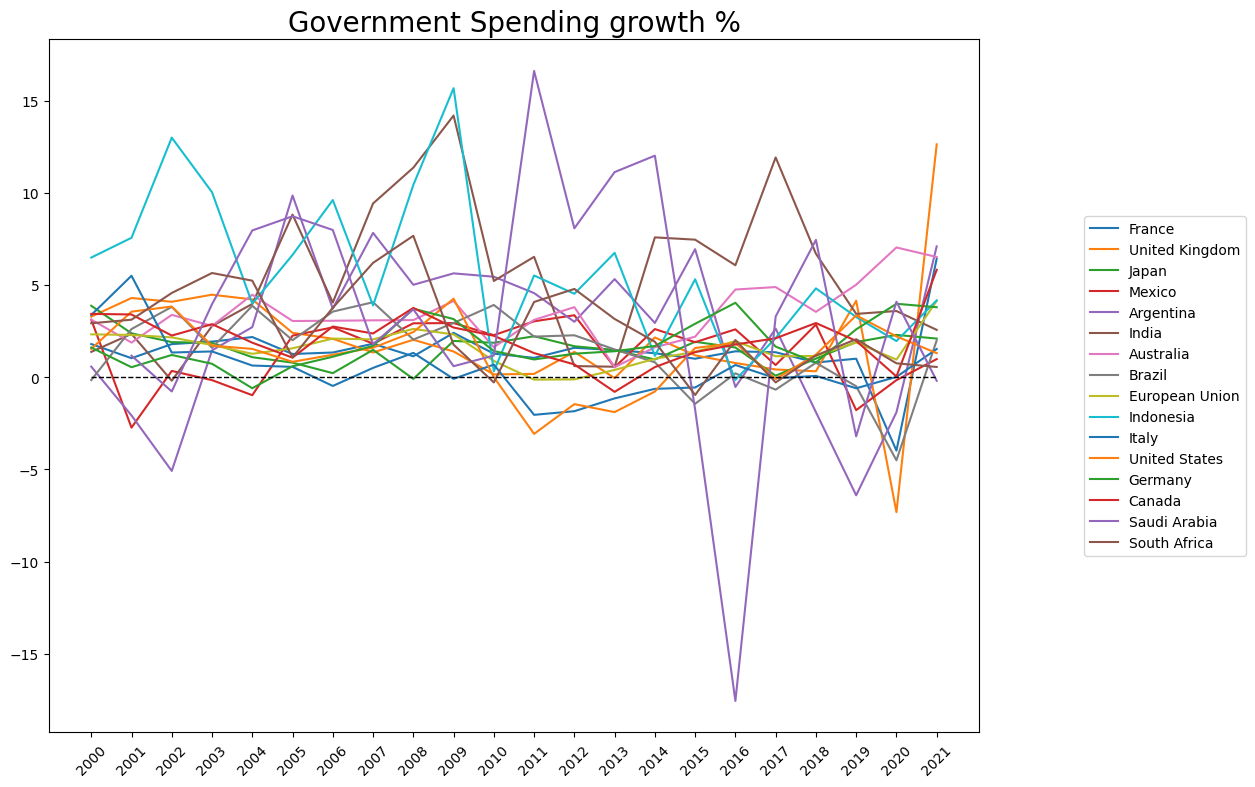

In [17]:
plt.figure(figsize=(12,9))
for c in G.columns:
  plt.plot(G.index, G[c])

plt.legend(G.columns, bbox_to_anchor=(1.2, 0.5), loc='center')
plt.plot(Y.index, [0]*len(Y.index), color='k', linestyle='dashed', linewidth=1)
plt.xticks(rotation=45)
plt.title('Government Spending growth %', size=20)
plt.show()

# c) 
Generate a scatter plot (including the “linear trend line”) for the country with the highest positive and for the country with the highest negative correlation in (b)(ii).

- highest corr: France
- lowest (negative) corr: Australia

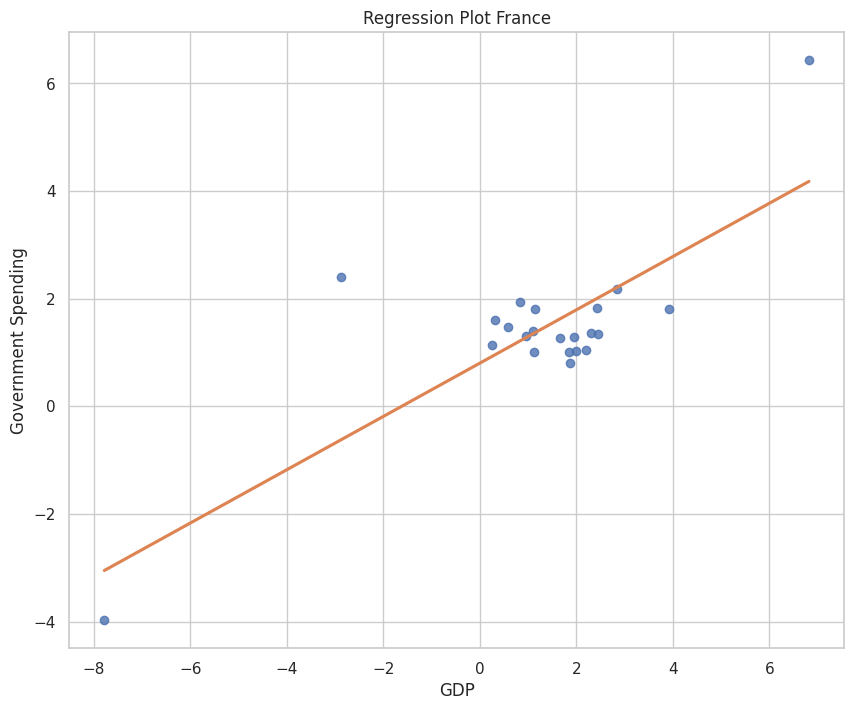

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

sns.set(style='whitegrid')

#sns.scatterplot(x=Y['France'], y=G['France'])

reg = sns.regplot(x=Y['France'], y=G['France'], ci=None, line_kws={"color": "C1"})
plt.xlabel('GDP'); plt.ylabel('Government Spending'); plt.title('Regression Plot France')
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np

# predictor must be 2d-array: n rows, 1 col
x = np.array(Y['France']).reshape((-1, 1))
# dependent var must be 1d-array
y = np.array(G['France'])

lm = LinearRegression
model = lm().fit(x, y)
print("France\nbeta_0: ",model.intercept_,"\nbeta_1: ", model.coef_[0])

France
beta_0:  0.8035085846787379 
beta_1:  0.4951535822840283


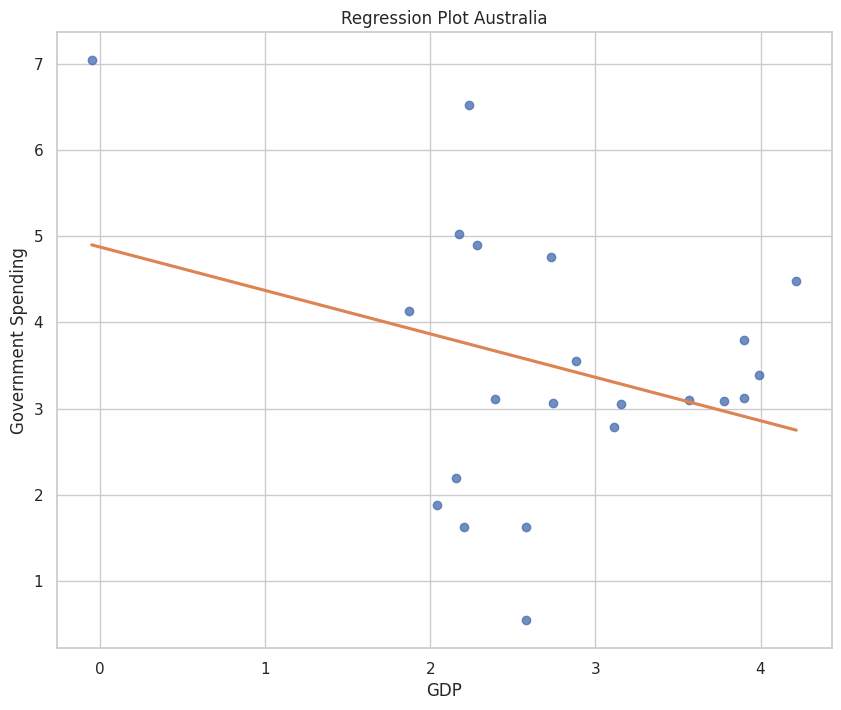

In [20]:
plt.figure(figsize=(10,8))

sns.set(style='whitegrid')

#sns.scatterplot(x=Y['France'], y=G['France'])

reg = sns.regplot(x=Y['Australia'], y=G['Australia'], ci=None, line_kws={"color": "C1"})
plt.xlabel('GDP'); plt.ylabel('Government Spending'); plt.title('Regression Plot Australia')
plt.show()

In [21]:
# 2d-array: n rows, 1 col
x = np.array(Y['Australia']).reshape((-1, 1))
# dependent var must be 1d-array
y = np.array(G['Australia'])

lm = LinearRegression
model = lm().fit(x, y)
print("Australia\nbeta_0:  ",model.intercept_,"\nbeta_1: ", model.coef_[0])

Australia
beta_0:   4.872819490266192 
beta_1:  -0.5031734863101462
